<a href="https://colab.research.google.com/github/Sabeeh789/Restaurant_Recommender/blob/main/Restaurant_Recommender_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("TripAdvisor_RestauarantRecommendation.csv")
df.head()

,Name,Street Address,Location,Type,Reviews,No of Reviews,Comments,Contact Number,Trip_advisor Url,Menu,Price_Range
0,Betty Lou's Seafood and Grill,318 Columbus Ave,"San Francisco, CA 94133-3908","Seafood, Vegetarian Friendly, Vegan Options",4.5 of 5 bubbles,243 reviews,NaN,+1 415-757-0569,https://www.tripadvisor.com//Restaurant_Review...,Check The Website for a Menu,$$ - $$$
1,Coach House Diner,55 State Rt 4,"Hackensack, NJ 07601-6337","Diner, American, Vegetarian Friendly",4 of 5 bubbles,84 reviews,"Both times we were there very late, after 11 P...",+1 201-488-4999,https://www.tripadvisor.com//Restaurant_Review...,Check The Website for a Menu,$$ - $$$
2,Table Talk Diner,2521 South Rd Ste C,"Poughkeepsie, NY 12601-5476","American, Diner, Vegetarian Friendly",4 of 5 bubbles,256 reviews,Waitress was very friendly but a little pricey...,+1 845-849-2839,https://www.tripadvisor.com//Restaurant_Review...,http://tabletalkdiner.com/menu/breakfast/,$$ - $$$
3,Sixty Vines,3701 Dallas Pkwy,"Plano, TX 75093-7777","American, Wine Bar, Vegetarian Friendly",4.5 of 5 bubbles,235 reviews,Not sure why I went there for the second time....,+1 469-620-8463,https://www.tripadvisor.com//Restaurant_Review...,https://sixtyvines.com/menu/plano-tx/,$$ - $$$
4,The Clam Bar,3914 Brewerton Rd,"Syracuse, NY 13212","American, Bar, Seafood",4 of 5 bubbles,285 reviews,Doesn't look like much from the outside but wa...,+1 315-458-1662,https://www.tripadvisor.com//Restaurant_Review...,Check The Website for a Menu,$$ - $$$


In [ ]:
df.shape

(3062, 11)

In [ ]:
df.columns

Index(['Name', 'Street Address', 'Location', 'Type', 'Reviews',
       'No of Reviews', 'Comments', 'Contact Number', 'Trip_advisor Url',
       'Menu', 'Price_Range'],
      dtype='object')

In [ ]:
df = df.drop(['Contact Number', 'Trip_advisor Url',
       'Menu'],axis=1)

In [ ]:
df.columns

Index(['Name', 'Street Address', 'Location', 'Type', 'Reviews',
       'No of Reviews', 'Comments', 'Price_Range'],
      dtype='object')

**Data Preprocessing**

In [ ]:
df.isnull().sum()

Name                0
Street Address      0
Location            0
Type               13
Reviews             0
No of Reviews       0
Comments          615
Price_Range         0
dtype: int64

In [ ]:
# Checking reviews and no of reviews
print(df.Reviews.unique())
display(df[df.Reviews=='No review'])

display(df[df['No of Reviews']=='Undefined Number'])


['4.5 of 5 bubbles' '4 of 5 bubbles' '5 of 5 bubbles' '3.5 of 5 bubbles'
 '3 of 5 bubbles' 'No review']


,Name,Street Address,Location,Type,Reviews,No of Reviews,Comments,Price_Range
1744,Wavershak's Deli,1800 Route 9,"Toms River, NJ 08755-1284",NaN,No review,Undefined Number,No Comments,Not Specified
2866,Wavershak's Deli,1800 Route 9,"Toms River, NJ 08755-1284",NaN,No review,Undefined Number,No Comments,Not Specified


,Name,Street Address,Location,Type,Reviews,No of Reviews,Comments,Price_Range
1744,Wavershak's Deli,1800 Route 9,"Toms River, NJ 08755-1284",NaN,No review,Undefined Number,No Comments,Not Specified
2866,Wavershak's Deli,1800 Route 9,"Toms River, NJ 08755-1284",NaN,No review,Undefined Number,No Comments,Not Specified


In [ ]:
df = df.drop([1744,2866])
df = df.reset_index(drop=True)
df

,Name,Street Address,Location,Type,Reviews,No of Reviews,Comments,Price_Range
0,Betty Lou's Seafood and Grill,318 Columbus Ave,"San Francisco, CA 94133-3908","Seafood, Vegetarian Friendly, Vegan Options",4.5 of 5 bubbles,243 reviews,NaN,$$ - $$$
1,Coach House Diner,55 State Rt 4,"Hackensack, NJ 07601-6337","Diner, American, Vegetarian Friendly",4 of 5 bubbles,84 reviews,"Both times we were there very late, after 11 P...",$$ - $$$
2,Table Talk Diner,2521 South Rd Ste C,"Poughkeepsie, NY 12601-5476","American, Diner, Vegetarian Friendly",4 of 5 bubbles,256 reviews,Waitress was very friendly but a little pricey...,$$ - $$$
3,Sixty Vines,3701 Dallas Pkwy,"Plano, TX 75093-7777","American, Wine Bar, Vegetarian Friendly",4.5 of 5 bubbles,235 reviews,Not sure why I went there for the second time....,$$ - $$$
4,The Clam Bar,3914 Brewerton Rd,"Syracuse, NY 13212","American, Bar, Seafood",4 of 5 bubbles,285 reviews,Doesn't look like much from the outside but wa...,$$ - $$$
...,...,...,...,...,...,...,...,...
3055,Indigo Kitchen & Ale House,2902 164th St SW,"Lynnwood, WA 98087-3201","American, Bar, Vegetarian Friendly",4.5 of 5 bubbles,198 reviews,We had to wait a few minutes to get it but it ...,$$ - $$$
3056,City Vineyard,233 West Street,"New York City, NY 10013","American, Bar, Seafood",4.5 of 5 bubbles,374 reviews,"Came here to see Andrea Gibson perform, we wer...",$$ - $$$
3057,BRIO Tuscan Grille,3710 US Highway 9,"Freehold, NJ 07728-4801","Steakhouse, Italian, Bar",4 of 5 bubbles,211 reviews,We come to Brio once a month. They are good fo...,$$ - $$$
3058,Maywood Pancake house,92 W Pleasant Ave,"Maywood, NJ 07607-1336","American, Vegan Options, Gluten Free Options",4 of 5 bubbles,87 reviews,Stopped in yesterday for Breakfast. When in Je...,$$ - $$$


In [ ]:
df.Comments = df.Comments.fillna('')

In [ ]:
df.Type = df.Type.fillna(df.Type.value_counts().index[0])

In [ ]:
df.isnull().sum()

Name              0
Street Address    0
Location          0
Type              0
Reviews           0
No of Reviews     0
Comments          0
Price_Range       0
dtype: int64

# Exploratory Data Analyisis

A. **10 Most Common Types of Cuisines**

In [ ]:
import itertools

In [ ]:
### Creating a list of all possible cuisines per restaurants (Multiple instances to later see popularity)
types = []
for i in range(len(df)):
    if type(df.Type[i]) == str:
        types.append(df.Type[i].split(","))
flat_list = list(itertools.chain(*types))
series = pd.Series(flat_list)

In [ ]:
import matplotlib.pyplot as plt

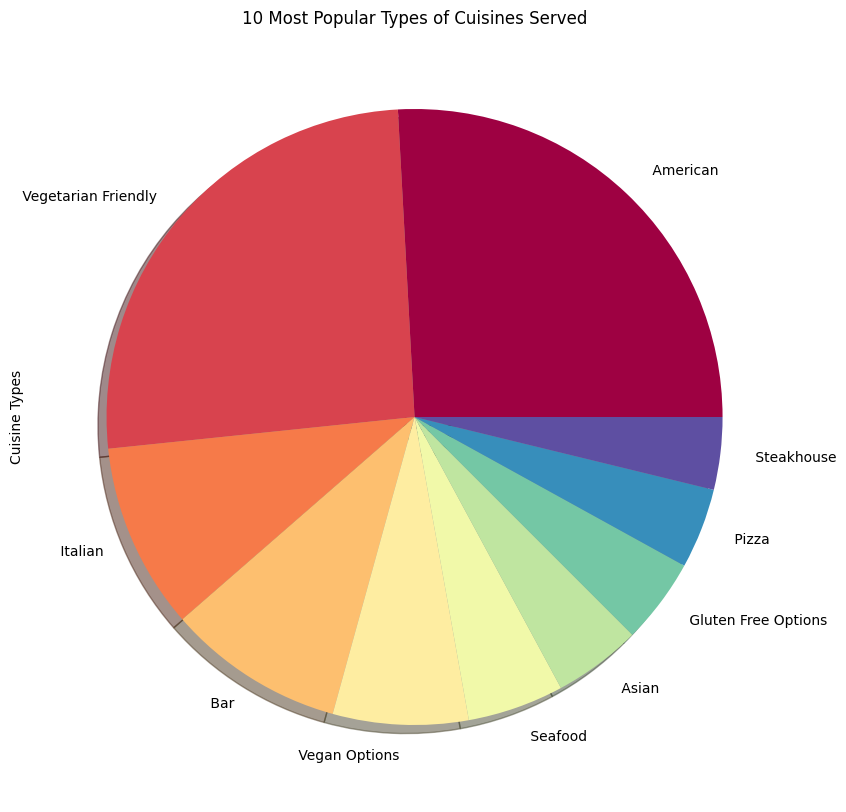

In [ ]:
ax = pd.Series(series).value_counts()[:10].plot(kind='pie', shadow=True,  cmap=plt.get_cmap('Spectral'), figsize=(10,10))
ax.set_ylabel('Cuisine Types')
plot = ax.set_title("10 Most Popular Types of Cuisines Served")

In [ ]:
pd.DataFrame({'No of Restuarants Serving':series.value_counts()}).head(10)

,No of Restuarants Serving
American,1558
Vegetarian Friendly,1553
Italian,588
Bar,561
Vegan Options,428
Seafood,305
Asian,278
Gluten Free Options,270
Pizza,254
Steakhouse,229


**B. Which state has the Most Number of Restaurants**

In [ ]:
df['State'] = [i.split(",")[-1].split(" ")[1] for i in df.Location]
df['ZipCode'] = [i.split(",")[-1].split(" ")[-1] for i in df.Location]
df['City'] = [",".join(i.split(",")[:-1]) for i in df.Location]
df = df.drop(['Location'],axis=1)
df

,Name,Street Address,Type,Reviews,No of Reviews,Comments,Price_Range,State,ZipCode,City
0,Betty Lou's Seafood and Grill,318 Columbus Ave,"Seafood, Vegetarian Friendly, Vegan Options",4.5 of 5 bubbles,243 reviews,,$$ - $$$,CA,94133-3908,San Francisco
1,Coach House Diner,55 State Rt 4,"Diner, American, Vegetarian Friendly",4 of 5 bubbles,84 reviews,"Both times we were there very late, after 11 P...",$$ - $$$,NJ,07601-6337,Hackensack
2,Table Talk Diner,2521 South Rd Ste C,"American, Diner, Vegetarian Friendly",4 of 5 bubbles,256 reviews,Waitress was very friendly but a little pricey...,$$ - $$$,NY,12601-5476,Poughkeepsie
3,Sixty Vines,3701 Dallas Pkwy,"American, Wine Bar, Vegetarian Friendly",4.5 of 5 bubbles,235 reviews,Not sure why I went there for the second time....,$$ - $$$,TX,75093-7777,Plano
4,The Clam Bar,3914 Brewerton Rd,"American, Bar, Seafood",4 of 5 bubbles,285 reviews,Doesn't look like much from the outside but wa...,$$ - $$$,NY,13212,Syracuse
...,...,...,...,...,...,...,...,...,...,...
3055,Indigo Kitchen & Ale House,2902 164th St SW,"American, Bar, Vegetarian Friendly",4.5 of 5 bubbles,198 reviews,We had to wait a few minutes to get it but it ...,$$ - $$$,WA,98087-3201,Lynnwood
3056,City Vineyard,233 West Street,"American, Bar, Seafood",4.5 of 5 bubbles,374 reviews,"Came here to see Andrea Gibson perform, we wer...",$$ - $$$,NY,10013,New York City
3057,BRIO Tuscan Grille,3710 US Highway 9,"Steakhouse, Italian, Bar",4 of 5 bubbles,211 reviews,We come to Brio once a month. They are good fo...,$$ - $$$,NJ,07728-4801,Freehold
3058,Maywood Pancake house,92 W Pleasant Ave,"American, Vegan Options, Gluten Free Options",4 of 5 bubbles,87 reviews,Stopped in yesterday for Breakfast. When in Je...,$$ - $$$,NJ,07607-1336,Maywood


In [ ]:
df = df.drop(df[df.State==''].index[0])
df.State.value_counts()

State
NY    650
CA    615
TX    614
WA    606
NJ    563
PA      9
OR      2
Name: count, dtype: int64

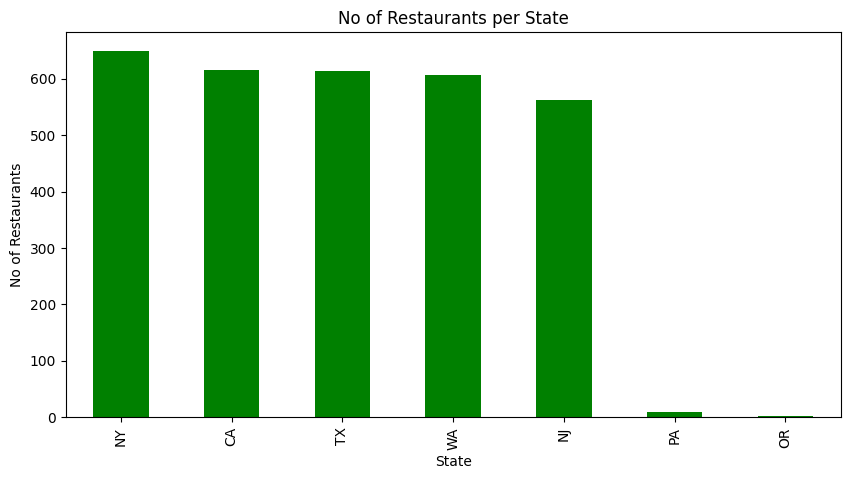

In [ ]:
ax = df.State.value_counts().plot(kind="bar", color="Green",  figsize=(10,5))

ax.set_ylabel('No of Restaurants')
ax.set_xlabel('State')
plot = ax.set_title("No of Restaurants per State")

In [ ]:
pd.DataFrame({'No of Restuarants per State':df.State.value_counts()}).head(10)

,No of Restuarants per State
State,
NY,650
CA,615
TX,614
WA,606
NJ,563
PA,9
OR,2


**C. Ranking the best (most highly rated) restaurants from each state**

Now most highly rated restaurant has to include two factors:
Number of people who reviewed
Review Ratings on 5

In [ ]:
### Converting the string values to float/int values
df['Reviews'] = [float(i.split(" ")[0]) for i in df.Reviews]
df['No of Reviews'] = [int(i.split(" ")[0].replace(",","")) for i in df['No of Reviews']]

In [ ]:
### Weighted Ratings - No of Reviewers * Average Ratings
df['weighted_ratings'] = df.Reviews*df['No of Reviews']
df.weighted_ratings

0       1093.5
1        336.0
2       1024.0
3       1057.5
4       1140.0
         ...  
3055     891.0
3056    1683.0
3057     844.0
3058     348.0
3059     823.5
Name: weighted_ratings, Length: 3059, dtype: float64

In [ ]:
import seaborn as sns

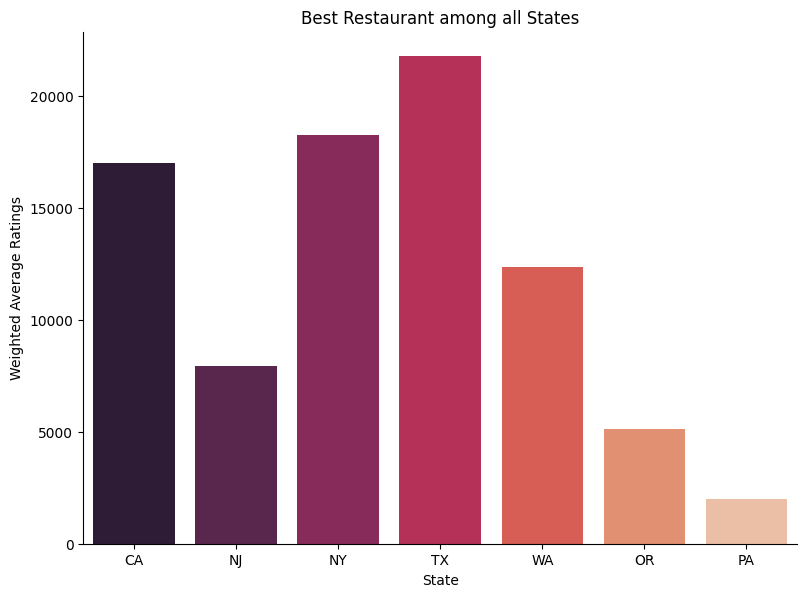

In [ ]:
labels = df.State.unique().flatten()
average_vote_share_list = [df[df.State==i].weighted_ratings.max() for i in labels]
avg_wt_ratings = pd.DataFrame({'State':labels, 'Weighted Average Ratings': average_vote_share_list})
plot = sns.catplot(x='State', y="Weighted Average Ratings", kind="bar", data=avg_wt_ratings, palette="rocket")
plt.title("Best Restaurant among all States")
plt.gcf().set_size_inches(9, 6)

In [ ]:
df[df.weighted_ratings==df.weighted_ratings.max()]

,Name,Street Address,Type,Reviews,No of Reviews,Comments,Price_Range,State,ZipCode,City,weighted_ratings
2164,Big Texan Steak Ranch,7701 E Interstate 40,"American, Steakhouse, Southwestern",4.0,5448,Roquefort dressing homemade and delicious. I h...,$$ - $$$,TX,79118-6915,Amarillo,21792.0


In [ ]:
df[df['No of Reviews'] == df['No of Reviews'].max()]

,Name,Street Address,Type,Reviews,No of Reviews,Comments,Price_Range,State,ZipCode,City,weighted_ratings
2164,Big Texan Steak Ranch,7701 E Interstate 40,"American, Steakhouse, Southwestern",4.0,5448,Roquefort dressing homemade and delicious. I h...,$$ - $$$,TX,79118-6915,Amarillo,21792.0


**D. Best State for Food?
(Based on Weighted Ratings)**

Weighted Ratings - No of Reviewers * Average Ratings.
Meaning 500 people giving an average rating of 4.0 is much more influential than 200 people giving an average rating of 4.5
Another Factor that would influence would be the number of restaurants. Each Restaurant will have its own set of reviewers and ratings

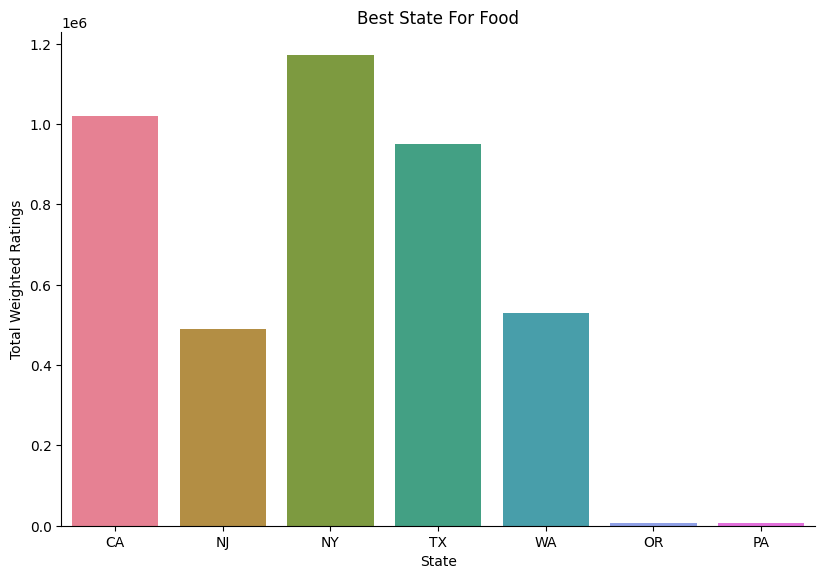

In [ ]:
labels = df.State.unique().flatten()
total_vote_share_list = [df[df.State==i].weighted_ratings.sum() for i in labels]
total_wt_ratings = pd.DataFrame({'State':labels, 'Total Weighted Ratings': total_vote_share_list})
plot = sns.catplot(x='State', y="Total Weighted Ratings", kind="bar", data=total_wt_ratings, palette="husl")
plt.title("Best State For Food")
plt.gcf().set_size_inches(9, 6)

**E. Best City for Food?**

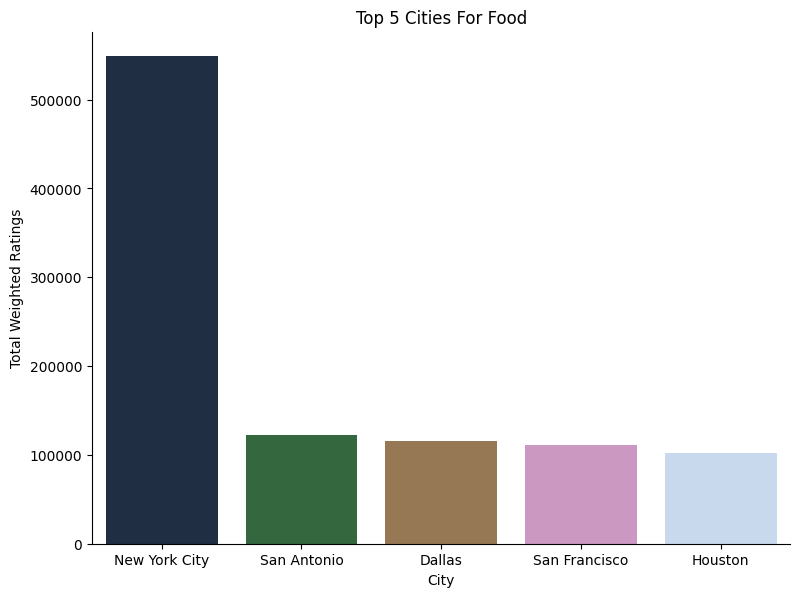

In [ ]:
labels = df.City.unique().flatten()
total_vote_share_list = [df[df.City==i].weighted_ratings.sum() for i in labels]
total_wt_ratings = pd.DataFrame({'City':labels, 'Total Weighted Ratings': total_vote_share_list})
total_wt_ratings = total_wt_ratings.sort_values(by=['Total Weighted Ratings'],ascending=False).head(5)
plot = sns.catplot(x='City', y="Total Weighted Ratings", kind="bar", data=total_wt_ratings, palette="cubehelix")
plt.title("Top 5 Cities For Food")
plt.gcf().set_size_inches(9, 6)

# Building a Recommender System

In [ ]:
df.Comments

0                                                        
1       Both times we were there very late, after 11 P...
2       Waitress was very friendly but a little pricey...
3       Not sure why I went there for the second time....
4       Doesn't look like much from the outside but wa...
                              ...                        
3055    We had to wait a few minutes to get it but it ...
3056    Came here to see Andrea Gibson perform, we wer...
3057    We come to Brio once a month. They are good fo...
3058    Stopped in yesterday for Breakfast. When in Je...
3059    First time for dinner. 2 couples. Delicious mu...
Name: Comments, Length: 3059, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
### Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

### Construct the required tf-idf matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df.Comments)

### Output Shape of tf-idf matrix
tfidf_matrix.shape

(3059, 6241)

In [ ]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
### Construct a reverse map of indices and restaurant names
indices = pd.Series(df.index, index=df.Name).drop_duplicates()
indices

Name
Betty Lou's Seafood and Grill       0
Coach House Diner                   1
Table Talk Diner                    2
Sixty Vines                         3
The Clam Bar                        4
                                 ... 
Indigo Kitchen & Ale House       3055
City Vineyard                    3056
BRIO Tuscan Grille               3057
Maywood Pancake house            3058
Porto Leggero                    3059
Length: 3059, dtype: int64

In [ ]:
### Function that gives us the most similar restaurants
def get_recommendations(name, cosine_sim=cosine_sim):

    ### Index of the restaurant which matches the name
    idx = indices[name]

    ### Get the pairwise similarity
    sim_scores = list(enumerate(cosine_sim[idx]))

    ### Sort the restaurants based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x:x[1], reverse=True)

    ### Get the similarity scores of the 10 Most similar restuarants
    sim_scores = sim_scores[1:11]

    ### Get the restauarant inidices
    restaurant_indices = [i[0] for i in sim_scores]

    ### Resturn the Top 10 most similar restaurants
    return df['Name'].iloc[restaurant_indices]
get_recommendations('Sixty Vines')

290     Little Sheep Mongolian Hot Pot, Flushing
1474                      Breakfast at Valerie's
2855                               Starwood Cafe
576                      Morton's The Steakhouse
357                 Zaytouna Mediterranean Grill
1167                                  RabbitHole
1778                            Black Bear Diner
2419                                 The Cottage
121                                 What The Pho
1389              Verrazano's Italian Restaurant
Name: Name, dtype: object